In [1]:
# Dependence of Sumbarine Melt (Qsm) on Temp and Strat
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import os
import gsw

In [2]:
### Variables for scaling Qsm
Qsg = 250 # Subglacial discharge
N = 20 # Number of data points
# Thermal forcing
T0 = 0 # Freezing temp of seawater
Tice = np.linspace(0, 12, N)
#Tice = np.linspace(8, 11, N)
TF = Tice - T0

# Stratification
Rhoz = np.linspace(5, 10, N) # Depth averaged density gradient
#Strat1 = np.sqrt(Rhoz)
Nsquare = np.linspace(2e-5, 3e-4, N) # Buoyancy frequency
#Strat2 = (Nsquare)**(5/8)

# Submarine melt
[Rhoz_mesh, TF_mesh1] = np.meshgrid(Rhoz, TF)
Qsm1 = TF_mesh1 / np.sqrt(Rhoz_mesh) # Scaling by (Magorrian & Wells, 2016)

[N2_mesh, TF_mesh2] = np.meshgrid(Nsquare, TF)
Qsm2 = TF_mesh2 / ((N2_mesh)**(5/8)) # Scaling by (Slater et al., 2016)

In [3]:
# Load dataset
DS = xr.open_dataset('~/Parameters/FjordModeling/Qsm_N2_T_depend01.nc')

# 'xx' in 'Txx' denote initial temperature for the runs; 'ns': no-sill case; 'ss': shallowest-sill case
N2T10_ns = DS.N2T10_ns.data
N2T10_ss = DS.N2T10_ss.data
N2T6_ns = DS.N2T6_ns.data
N2T6_ss = DS.N2T6_ss.data
N2T2_ns = DS.N2T2_ns.data
N2T2_ss = DS.N2T2_ss.data

T10_ns = DS.T10_ns.data
T10_ss = DS.T10_ss.data
T6_ns = DS.T6_ns.data
T6_ss = DS.T6_ss.data
T2_ns = DS.T2_ns.data
T2_ss = DS.T2_ss.data

QsmT10_ns = DS.QsmT10_ns.data
QsmT10_ss = DS.QsmT10_ss.data
QsmT6_ns = DS.QsmT6_ns.data
QsmT6_ss = DS.QsmT6_ss.data
QsmT2_ns = DS.QsmT2_ns.data
QsmT2_ss = DS.QsmT2_ss.data

In [4]:
# Determine the colorbar range of Qsm, exclude the 0.5N02 case
Qsm = np.concatenate([QsmT10_ss[:-1], QsmT10_ns[:-1], QsmT6_ss[:-1], QsmT6_ns[:-1], QsmT2_ss[:-1], QsmT2_ns[:-1]], axis=0)
min_, max_ = Qsm.min(), Qsm.max()

In [5]:
# Calculate the dependency of Qsm on combined fjord conditions from model outputs
Temp_M = np.concatenate([T10_ss[:-1], T10_ns[:-1], T6_ss[:-1], T6_ns[:-1], T2_ss[:-1], T2_ns[:-1]], axis=0)
N2_M = np.concatenate([N2T10_ss[:-1], N2T10_ns[:-1], N2T6_ss[:-1], N2T6_ns[:-1], N2T2_ss[:-1], N2T2_ns[:-1]], axis=0)
Qsm_nd = Temp_M / ((N2_M)**(5/8))

# Linear regression
model = np.polyfit(Qsm_nd, Qsm, 1) 
model_x, model_y = Qsm_nd, model[0]*Qsm_nd+model[1]

model[0], model[1]

(0.0014532081436967124, 1.6022499550774116)

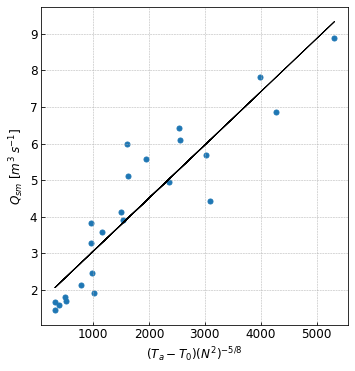

In [6]:
# Qsm vs. T&N2
fig1,ax=plt.subplots(figsize=(5,5))
plt.tight_layout()
plt.plot()
sc1 = ax.scatter(Qsm_nd,Qsm,s=25)

ax.plot(model_x,model_y, 'k-',lw=1)
#ax.legend(loc='lower right', fontsize=10)
ax.grid(linestyle='--', linewidth=0.5)

ax.set_xlabel('$(T_a-T_0)(N^2)^{-5/8}$',fontsize=12)
ax.set_ylabel('$Q_{sm}$ [$m^3\;s^{-1}$]',fontsize=12)
#ax.set_title('Outer Sill (March)',fontsize=12, fontweight='bold')
#ax.set_title('Inner Sill (March)',fontsize=12, fontweight='bold')
#ax.set_title('2016-03',fontsize=12, fontweight='bold')
ax.tick_params(direction='in', labelsize=12)



In [7]:
# Linear regression
Qsm_fit = Qsm2*model[0]+model[1]
Qsm_fit.max(), Qsm_fit.min(), Qsm_fit.mean()

(16.680999291449698, 1.6022499550774116, 4.2414386359685405)

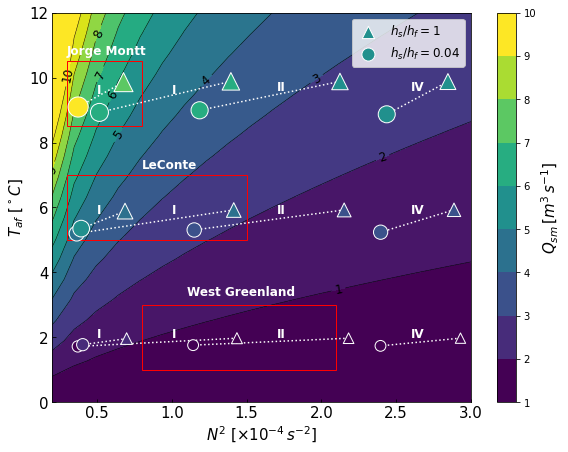

In [8]:
# Parameter Space for Qsm dependency on thermal forcing (T_af) and stratification  (N^2)
fig2, ax0 =plt.subplots(figsize=(8,6))
fig2.tight_layout() 

import matplotlib as mpl
cmap = mpl.cm.viridis
bounds = np.linspace(1,10,10)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

#cqsm = np.linspace(300,5100,9)
cqsm = np.linspace(1,10,10)
#cs = ax0.contour(Nsquare*1e4,TF,Qsm2*model[0],cqsm, linestyles='-',linewidths=2, zorder=1)
manual_locations = [(1.5, 1), (1.8, 7), 
                    (0.8, 8), (0.8, 11), 
                    (0.5, 11)]
#plt.clabel(cs,cs.levels[::2], fontsize=12, inline=1, manual=manual_locations, zorder=1)
#plt.clabel(cs, fontsize=12, inline=1, zorder=1)

im1 = ax0.contourf(Nsquare*1e4,TF,Qsm2*model[0],cqsm, extend='both',zorder=1)
cs = ax0.contour(Nsquare*1e4,TF,Qsm2*model[0],cqsm,colors='k',linestyles='-',linewidths=.5, zorder=1)
manual_location1 = [(2.2, 2.2), (2.5, 6.5), (2, 9), (1.2, 10), (0.7, 8.5), 
                    (0.8, 11), (0.6, 11), (0.4, 10), (0.4, 10.5), (0.2, 11)]
plt.clabel(cs, fontsize=12, inline=1, zorder=1)

strat1_ns, temp1_ns, qsm1_ns = N2T10_ns[:-1]*1e4, T10_ns[:-1], QsmT10_ns[:-1]
strat1_ss, temp1_ss, qsm1_ss = N2T10_ss[:-1]*1e4, T10_ss[:-1], QsmT10_ss[:-1]
strat2_ns, temp2_ns, qsm2_ns = N2T6_ns[:-1]*1e4, T6_ns[:-1], QsmT6_ns[:-1]
strat2_ss, temp2_ss, qsm2_ss = N2T6_ss[:-1]*1e4, T6_ss[:-1], QsmT6_ss[:-1]
strat3_ns, temp3_ns, qsm3_ns = N2T2_ns[:-1]*1e4, T2_ns[:-1], QsmT2_ns[:-1]
strat3_ss, temp3_ss, qsm3_ss = N2T2_ss[:-1]*1e4, T2_ss[:-1], QsmT2_ss[:-1]

# Marker size based on initial stratification
volume = np.array([8,4,2,1])*80

vol1=qsm1_ns/Qsg*1e4 + 50
vol2=qsm1_ss/Qsg*1e4 + 50
vol3=qsm2_ns/Qsg*1e4 + 50
vol4=qsm2_ss/Qsg*1e4 + 50
vol5=qsm3_ns/Qsg*1e4 + 50
vol6=qsm3_ss/Qsg*1e4 + 50

plt.scatter(strat1_ns,temp1_ns,s=vol1, c=qsm1_ns, cmap=cmap, marker='^',
            edgecolors='w', norm=norm, alpha=1, label='$h_s/h_f=1$', zorder=3)
plt.clim(min_, max_)
plt.scatter(strat1_ss,temp1_ss,s=vol2, c=qsm1_ss, cmap=cmap, marker='o',
            edgecolors='w', norm=norm, alpha=1, label='$h_s/h_f=0.04$', zorder=3)
plt.clim(min_, max_)
# plt.scatter(strat1_ns,temp1_ns,s=vol1, c='grey', marker='^',
#             norm=norm, alpha=1, label='$h_s/h_f=1$', zorder=2)
# plt.scatter(strat1_ss,temp1_ss,s=vol2, c='grey', marker='o',
#             norm=norm, alpha=1, label='$h_s/h_f=0.04$', zorder=2)
for i in range(len(volume)):
    ax0.plot([strat1_ns[i],strat1_ss[i]],[temp1_ns[i],temp1_ss[i]],'w:', zorder=2)

plt.scatter(strat2_ns,temp2_ns,s=vol3, c=qsm2_ns, cmap=cmap, marker='^',
            edgecolors='w', norm=norm, alpha=1, zorder=3)
plt.clim(min_, max_)
plt.scatter(strat2_ss,temp2_ss,s=vol4, c=qsm2_ss, cmap=cmap, marker='o',
            edgecolors='w', norm=norm, alpha=1, zorder=3)
plt.clim(min_, max_)
# plt.scatter(strat2_ns,temp2_ns,s=vol3, c='grey', marker='^',
#             norm=norm, alpha=1, zorder=2)
# plt.scatter(strat2_ss,temp2_ss,s=vol4, c='grey', marker='o',
#             norm=norm, alpha=1, zorder=2)
for i in range(len(volume)):
    ax0.plot([strat2_ns[i],strat2_ss[i]],[temp2_ns[i],temp2_ss[i]],'w:', zorder=2)

plt.scatter(strat3_ns,temp3_ns,s=vol5, c=qsm3_ns, cmap=cmap, marker='^',
            edgecolors='w', norm=norm, alpha=1, zorder=3)
plt.clim(min_, max_)
plt.scatter(strat3_ss,temp3_ss,s=vol6, c=qsm3_ss, cmap=cmap, marker='o',
            edgecolors='w', norm=norm, alpha=1, zorder=3)
plt.clim(min_, max_)
# plt.scatter(strat3_ns,temp3_ns,s=vol5, c='grey', marker='^',
#             norm=norm, alpha=1, zorder=2)
# plt.scatter(strat3_ss,temp3_ss,s=vol6, c='grey', marker='o',
#             norm=norm, alpha=1, zorder=2)

for i in range(len(volume)):
    ax0.plot([strat3_ns[i],strat3_ss[i]],[temp3_ns[i],temp3_ss[i]],'w:', zorder=2)
# plt.annotate('$0.5N^2_0-4N^2_0$', xy=(2.5,10.2), xytext=(.8,10.25),
#             xycoords='data', arrowprops=dict(facecolor='black',width=1), fontsize=15)

plt.legend(loc='best', markerscale=0.7, fontsize=12)

#plt.ylim([8,11])

cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap))
cbar.set_ticks([1,2,3,4,5,6,7,8,9,10])
cbar.set_label('$Q_{sm}\,[m^3\,s^{-1}]$', fontsize=15)
plt.tick_params(direction='in', labelsize=15)
plt.ylabel(r'$T_{af}$ [$^\circ C$]', size=15)
plt.xlabel(r'$N^2$ [$\times10^{-4}\,s^{-2}$]', size=15)


# # strat vs temp line
# ax0.plot(Nsquare*1e4,Nsquare*1e4*8/5,'r-',lw=2)
# ax0.text(1.3,7.1,'Strat. Sensitive',size=12,c='r',weight='bold')
# ax0.text(1.4,.8,'Temp. Sensitive',size=12,c='r',weight='bold')

# Regime labels
# Regime I
ax0.text(0.5,9.5,'I',size=12,c='w',weight='bold')
ax0.text(1,9.5,'I',size=12,c='w',weight='bold')
ax0.text(0.5,5.8,'I',size=12,c='w',weight='bold')
ax0.text(1,5.8,'I',size=12,c='w',weight='bold')
ax0.text(0.5,2,'I',size=12,c='w',weight='bold')
ax0.text(1,2,'I',size=12,c='w',weight='bold')
# Regime II
ax0.text(1.7,9.6,'II',size=12,c='w',weight='bold')
ax0.text(1.7,5.8,'II',size=12,c='w',weight='bold')
ax0.text(1.7,2,'II',size=12,c='w',weight='bold')
# Regime IV
ax0.text(2.6,9.6,'IV',size=12,c='w',weight='bold')
ax0.text(2.6,5.8,'IV',size=12,c='w',weight='bold')
ax0.text(2.6,2,'IV',size=12,c='w',weight='bold')

from matplotlib.patches import Rectangle
rect1 = Rectangle((.3,8.5),.5,2,facecolor='none',edgecolor='r',lw=1)
ax0.text(.3,10.7,'Jorge Montt',size=12,c='w',weight='bold')
rect2 = Rectangle((.3,5),1.2,2,facecolor='none',edgecolor='r',lw=1)
ax0.text(.8,7.2,'LeConte',size=12,c='w',weight='bold')
# rect3 = Rectangle((.3,1.2),2.5,1.5,facecolor='none',edgecolor='r',lw=1)
# ax0.text(1.3,3.1,'Greenland',size=12,c='w',weight='bold')
rect3 = Rectangle((.8,1),1.3,2,facecolor='none',edgecolor='r',lw=1)
ax0.text(1.1,3.3,'West Greenland',size=12,c='w',weight='bold')
# Add the patch to the Axes
ax0.add_patch(rect1)
ax0.add_patch(rect2)
ax0.add_patch(rect3)

In [9]:
fig_path ="/home/1959/Jupyter_Figs/FjordModeling/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

fig2.savefig(fig_path + 'Qsm_dependency_contourf_v0925.png', dpi=300, bbox_inches='tight')
#fig1.savefig(fig_path + 'Qsm_TN2_v0822.png', dpi=300, bbox_inches='tight')